In [2]:
%run import_files.ipynb

data_day_ahead, data_physical_flow = import_csv_files()

,Difference,FlowValue
DateTime,,
2020-09-06,27.210774,301.5225
2020-09-13,26.151607,1210.3850
2020-09-20,38.868512,76.7000
2020-09-27,38.249464,121.0250
2020-10-04,33.716012,1524.2600
...,...,...
2023-12-03,4.259631,22251.4950
2023-12-10,0.207393,63249.6975
2023-12-17,4.658917,11020.3850


Text(0.5, 1.0, 'Weekly Average Price Difference (Germany and NO2) with Net Exports from NO2\nCorrelation Coefficient: -0.59')

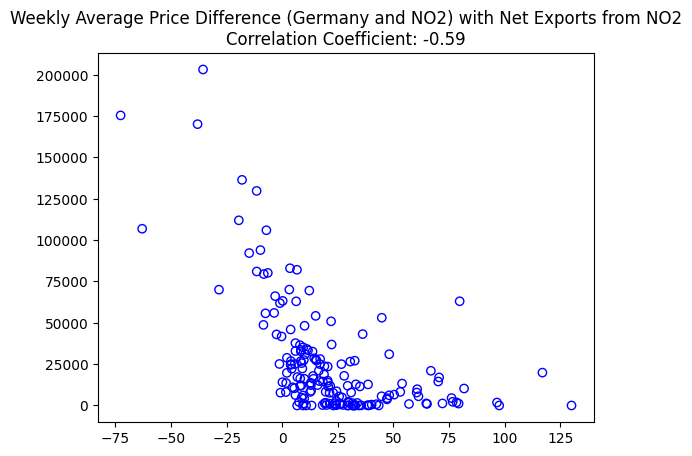

In [3]:
import matplotlib.pyplot as plt

price_data_NO2 = data_day_ahead[data_day_ahead['MapCode'].isin(['NO2'])]
price_data_DE = data_day_ahead[data_day_ahead['MapCode'].isin(['DE_LU'])]

price_data_NO2 = price_data_NO2.set_index('DateTime')
price_data_DE = price_data_DE.set_index('DateTime')

price_data_NO2_weekly = price_data_NO2[['Price']].resample('W').mean()
price_data_DE_weekly = price_data_DE[['Price']].resample('W').mean()

price_differences = pd.merge(price_data_NO2_weekly, price_data_DE_weekly, left_on='DateTime', right_on='DateTime', suffixes=('_NO2', '_DE'))
price_differences['Difference'] = price_differences['Price_DE'] - price_differences['Price_NO2']


df_import_from_DE = data_physical_flow[data_physical_flow['OutMapCode'].isin(['DE_LU'])]

df_NO2_to_DE = df_import_from_DE[df_import_from_DE['InMapCode'].isin(['NO2'])]
df_NO2_to_DE = df_NO2_to_DE.set_index('DateTime')
df_NO2_to_DE_weekly = df_NO2_to_DE[['FlowValue']].resample('W').sum()



# plot should have:
# y - axis:
# weekly sum of net exports in NO2
# x - axis:
# weekly average price difference between Germany and NO2

plot_df = pd.merge(price_differences['Difference'], df_NO2_to_DE_weekly['FlowValue'], left_on='DateTime', right_on='DateTime', how='inner')

correlation_coeff = plot_df['FlowValue'].corr(plot_df['Difference'])
display(plot_df)
plt.scatter(plot_df['Difference'] ,plot_df['FlowValue'], c='none', edgecolors='blue' )
plt.title(f'Weekly Average Price Difference (Germany and NO2) with Net Exports from NO2\nCorrelation Coefficient: {correlation_coeff:.2f}')
